Q1 - HELPrct

In [2]:
# Imports packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imports data
hrct = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/HELPrct.csv")

# Part a)

# Calculates the mean of all numeric variables
mean_all = hrct.select_dtypes(include=['number']).mean()

# Shows the result
print(mean_all)
print("Emily")

age                  35.653422
anysubstatus          0.772358
cesd                 32.847682
d1                    3.059603
daysanysub           75.307377
dayslink            255.605568
drugrisk              1.887168
e2b                   2.504673
female                0.236203
i1                   17.907285
i2                   24.547461
id                  233.401766
indtot               35.728477
linkstatus            0.378190
mcs                  31.676678
pcs                  48.048542
pss_fr                6.706402
sexrisk               4.642384
avg_drinks           17.907285
max_drinks           24.547461
hospitalizations      3.059603
dtype: float64
Emily


In [3]:

# Part b)

# Creates variable age_groups
age_group = pd.cut(hrct['age'], bins=range(0,99,10), right=False, labels=False)

# Finds the mean of all numeric variables stratified by sex and age
stratified = hrct.groupby(['sex', age_group])[hrct.select_dtypes(include=['number']).columns].mean()

# Shows the result
print(stratified)

                  age  anysubstatus       cesd         d1  daysanysub  \
sex    age                                                              
female 2    26.277778      0.800000  40.277778   1.944444   64.500000   
       3    34.305085      0.750000  35.542373   3.593220   86.892857   
       4    44.480000      0.571429  36.880000   3.880000   89.785714   
       5    54.000000      0.600000  40.600000   5.800000   88.000000   
male   1    19.000000           NaN  40.000000   1.000000         NaN   
       2    26.000000      0.828571  32.936709   1.911392   77.114286   
       3    34.560694      0.780000  30.317919   2.572254   75.656566   
       4    43.750000      0.804348  32.500000   4.175000   67.800000   
       5    55.000000      0.714286  34.166667   6.000000   50.571429   
       6    60.000000      1.000000  36.000000  10.000000    6.000000   

              dayslink  drugrisk       e2b  female         i1  ...  \
sex    age                                           

In [ ]:
#print(stratified.head())
#print(type(stratified))

<function matplotlib.pyplot.show(close=None, block=None)>

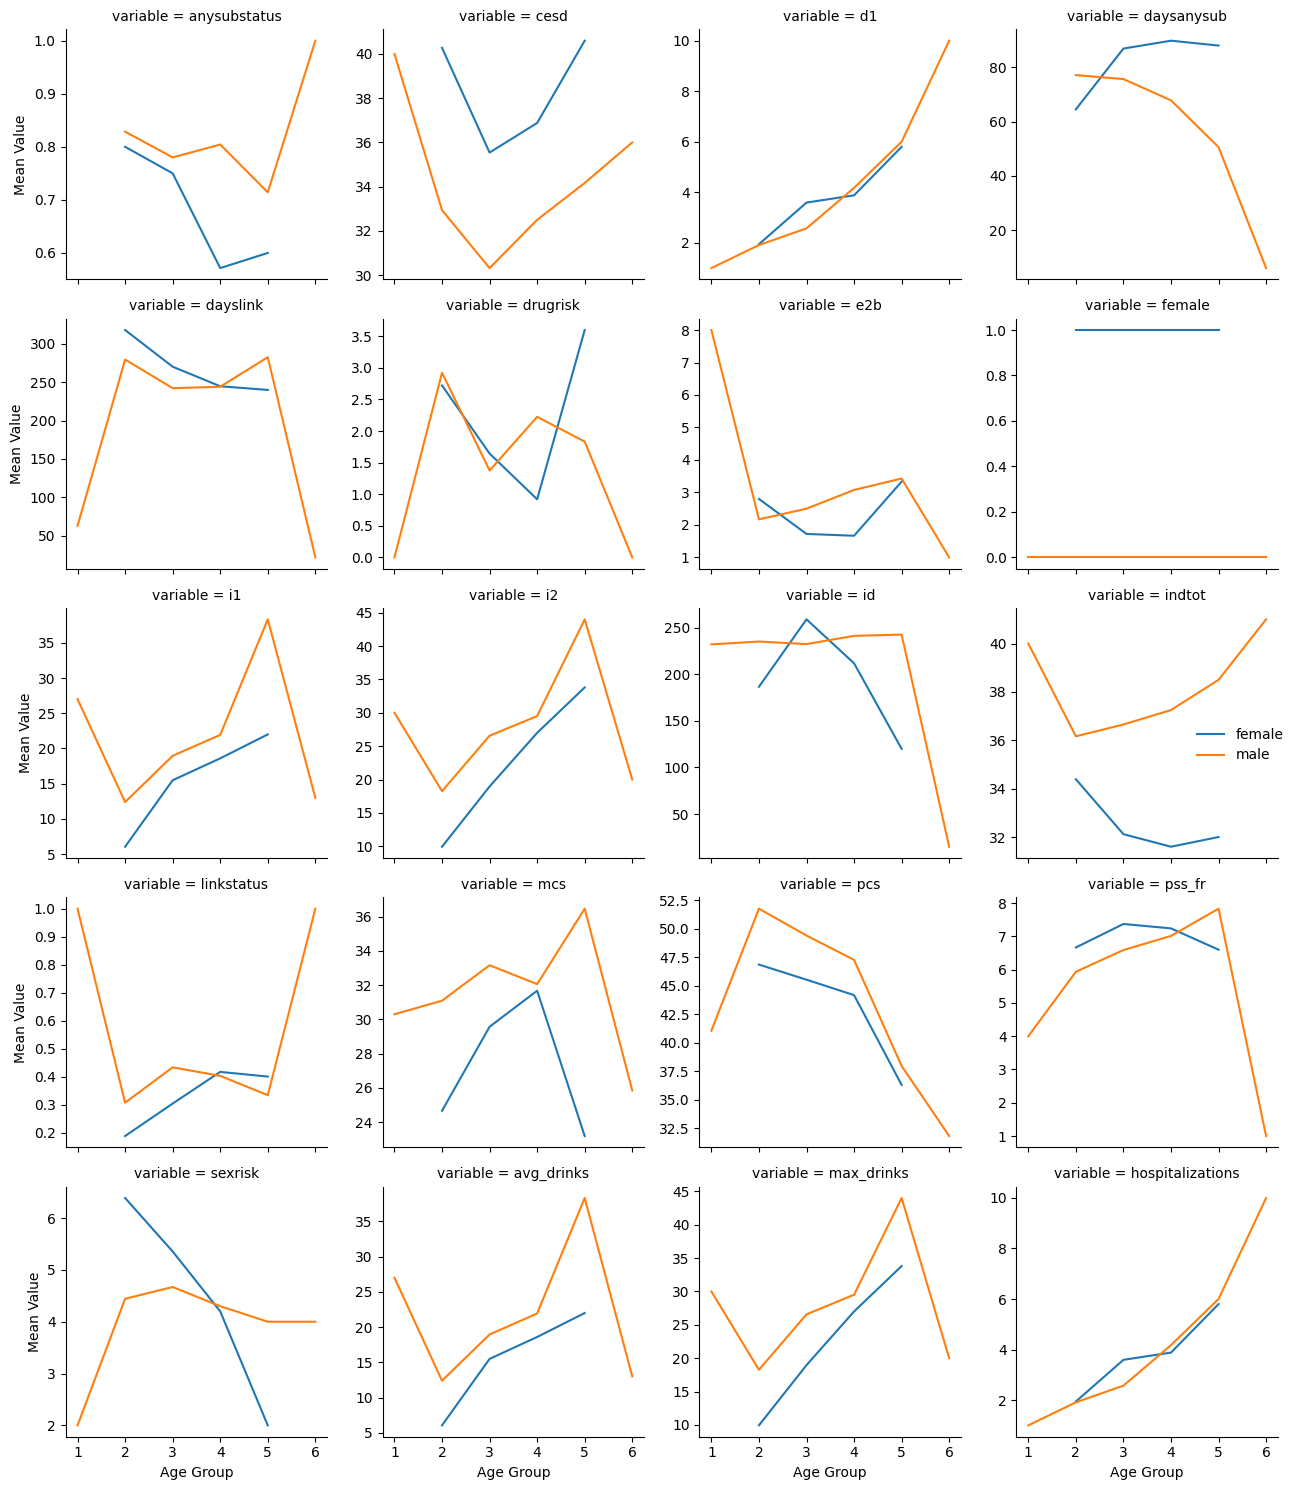

In [4]:

# Part c)

# Resets the index to make sex a regular column
stratified = stratified.drop('age', axis = 1).reset_index()

# Creates line plots for each numeric variable stratified by sex and age group
num_vars = hrct.select_dtypes(include=['number']).columns

# Melts data for plotting
melt_hrct = pd.melt(stratified, id_vars=['sex','age'], value_vars=num_vars)

# Graphs linear plots
g = sns.FacetGrid(melt_hrct, col="variable", sharey=False, col_wrap=4)
g.map(sns.lineplot, "age", "value", "sex")
g.set_axis_labels("Age Group", "Mean Value")
g.add_legend()

# Shows the result
plt.tight_layout()
plt.show



Q2 - Lahmna

In [27]:
# Imports data
teams = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Teams.csv")

# Combines Brooklyn baseball teams
bk_teams = ["BR1","BR2","BR3","BR4","BRO","BRP","BRF"]

# Filters data for Brooklyn teams
brook_teams = teams[teams["teamID"].isin(bk_teams)]

# Runs the function that counts number of unique seasons played
count_seasons = brook_teams.groupby("teamID")["yearID"].nunique().reset_index()

# Renames columns
count_seasons.columns = ["TeamsID", "Seasons Played"]

# Shows the result
print(count_seasons)

  TeamsID  Seasons Played
0     BR1               1
1     BR2               4
2     BR3               6
3     BR4               1
4     BRF               2
5     BRO              68
6     BRP               1
